In [1]:
import youtokentome as yttm
model_path = '/gpfs/data/johnsonslab/nlp-genomics/english_corpora/brown_8192k.model'
bpe = yttm.BPE(model=model_path)
import matplotlib.pyplot as plt
import operator
import numpy as np


In [2]:

# with(open('/gpfs/data/johnsonslab/nlp-genomics/english_corpora/brown_nolines.txt', 'r')) as f:
#     with(open('/gpfs/data/johnsonslab/nlp-genomics/english_corpora/brown_nowhitelines.txt', 'w')) as g:
#         for line in f.readlines():
#             if(line != "\n"):
#                 g.write(" ".join(line.split()) + "\n")
        

# Tokenizing Brown Corpus

### Tokenization

In [3]:
tokenizations = []
with(open('/gpfs/data/johnsonslab/nlp-genomics/english_corpora/brown_nowhitelines.txt', 'r')) as f:
    for line in f.readlines():
        tokenizations.append(bpe.encode(line.strip(), output_type =yttm.OutputType.SUBWORD))


### Counting tokens

In [13]:
freqs = {}
for tokenization in tokenizations:
    for token in tokenization:
        if token in freqs.keys():
            freqs[token] +=1
        else:
            freqs[token] = 1
sorted_freqs = sorted(freqs.items(), key=operator.itemgetter(1), reverse=True)
sorted_freq_values=[sorted_freqs[i][1] for i in range(len(sorted_freqs))]

### Plotting rank vs. frequency

Text(0, 0.5, 'Log(Frequency)')

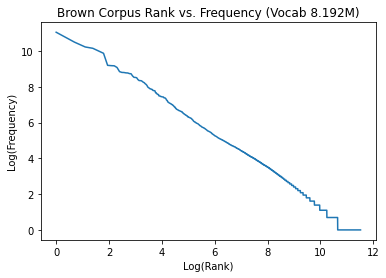

In [18]:
plt.plot(np.log(np.arange(1, len(freqs)+1)),np.log(sorted_freq_values))
plt.title('Brown Corpus Rank vs. Frequency (Vocab 8.192M)')
plt.xlabel('Log(Rank)')
plt.ylabel('Log(Frequency)')

In [9]:
print(np.log(list(freqs.values()))[:10])

[ 8.77214544  2.77258872  4.06044301  2.83321334  0.69314718  6.85646198
  3.63758616  8.16593214  3.40119738 10.48840901]


In [7]:
print(np.log(np.arange(1,len(freqs)+1)))

[ 0.          0.69314718  1.09861229 ... 11.51526273 11.51527271
 11.51528268]
